In [1]:
import os
import sys
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import json

In [2]:
def get_json_file_list(dir_path):
    json_file_list = []
    for root, dirs, files in os.walk(dir_path):
        for file in files:
            if file.endswith(".json"):
                json_file_list.append(os.path.join(root, file))
    # print("Number of json files: {}".format(len(json_file_list)))
    return json_file_list

def load_jason_file(json_file):
    with open(json_file, 'r') as f:
        # print("file: {}".format(f))
        return json.load(f)
    
def load_dataframe_from_bunch_of_json_files(json_files):
    data = []
    for json_file in json_files:
        data.append(load_jason_file(json_file))
    # print("Number of json files: {}".format(len(data)))
    # print(data)
    # data["release"]
    return pd.DataFrame(data)

In [3]:
data_path = "../CE7490-data/FixKeepAliveWindowPolicy_5/"

df = load_dataframe_from_bunch_of_json_files(get_json_file_list(data_path))

In [4]:
# print(df.head())

In [13]:

df["cold_start_count"] = df["coldstart"].apply(lambda x: len(x))
df["warm_start_count"] = df["warmstart"].apply(lambda x: len(x))
df["invoc_count2"] = df["cold_start_count"] + df["warm_start_count"]
df["invoc_count"] = df["policy_record"].apply(lambda x: x["invoc_count"])
# df["waste_memory_time"] = df["keeplive_win"].apply(lambda x: x[0][1]-x[0][0])
df["cold_start_percent"] = df["cold_start_count"] / df["invoc_count"]
df["cold_start_percent_check"] = df["cold_start_count"].apply(lambda x: -1 if x>1 else 0).astype(int)
df["cold_start_percent_check"].value_counts()

# # df["keeplive_win"].head() 
# # df["waste_memory_time"] = df["keeplive_win"].apply(lambda x : np.array(x)[:,1]-np.array(x)[:, 0])
# df["keeplive_win"].apply(lambda x : np.array(x, dtype=object).shape).head()
# df["waste_memory_time"] = df["keeplive_win"].apply(lambda x : (np.array(x, dtype=object)[:,1]-np.array(x, dtype=object)[:, 0]) if np.array(x, dtype=object).shape[1] != None else np.zeros(np.array(x, dtype=object).shape))
# df["waste_memory_time"].head()
# df["cold_start_percent"].head(100)
# df["invoc_count"].head()
# # print(get_json_file_list(data_path)[2])

-1    567
 0     12
Name: cold_start_percent_check, dtype: int64

In [6]:
# df["invoc_count2"].head()
# # all are timestampe 
# dummy_data = {
#     "release" : [],
#     "coldstart" : [],
#     "warmstart" : [],
#     "warm_state" : [],
#     "run_state" : [],
#     "win_state" : [],
#     "policy_record" : [],
#     "obb_count" : [],
# }


In [7]:
def count(data, key):
    return len(data[key])

In [4]:
def draw_line_chart(dataframe, x, y, hue = None):
    sns.set_theme(style="darkgrid")
    sns.lineplot(x=x, y=y, hue=hue, data=dataframe)
    plt.show()
    
def draw_bar_chart(dataframe, x, y, hue = None):
    sns.set_theme(style="darkgrid")
    sns.barplot(x=x, y=y, hue=hue, data=dataframe)
    plt.show()
    
def draw_cdf(dataframe, x, hue = None):
    sns.set_theme(style="darkgrid")
    sns.ecdfplot(x=x, hue=hue, data=dataframe)
    plt.show()



In [8]:
def draw_cold_start_cdf(dataframe, x="cold_start_percent", y="CDF"):
    draw_cdf(dataframe, x, hue="policy")
    
def draw_multi_cold_start_cdf(dataframe_list, x="cold_start_percent", y="CDF"):
    for df in dataframe_list:
        draw_cold_start_cdf(df, x, y)

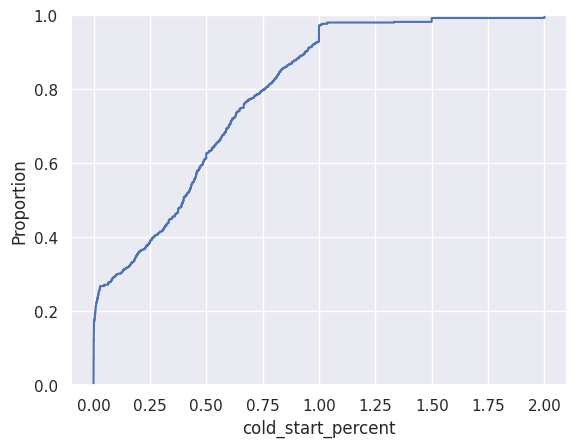

In [10]:
# (df, "cold_start_percent", hue="policy")

sns.set_theme(style="darkgrid")
sns.ecdfplot(x="cold_start_percent", data=df)
plt.show()